# Sudoku

This tutorial includes everything you need to set up decision optimization engines, build constraint programming models.


Table of contents:

-  [Describe the business problem](#Describe-the-business-problem)
*  [How decision optimization (prescriptive analytics) can help](#How--decision-optimization-can-help)
*  [Use decision optimization](#Use-decision-optimization)
    *  [Step 1: Model the Data](#Step-1:-Model-the-data)
    *  [Step 2: Set up the prescriptive model](#Step-2:-Set-up-the-prescriptive-model)
        * [Define the decision variables](#Define-the-decision-variables)
        * [Express the business constraints](#Express-the-business-constraints)
        * [Express the objective](#Express-the-objective)
        * [Solve with Decision Optimization solve service](#Solve-with-Decision-Optimization-solve-service)
    *  [Step 3: Investigate the solution and run an example analysis](#Step-3:-Investigate-the-solution-and-then-run-an-example-analysis)
*  [Summary](#Summary)
****

### Describe the business problem

* Sudoku is a logic-based, combinatorial number-placement puzzle.
* The objective is to fill a 9x9 grid with digits so that each column, each row,
and each of the nine 3x3 sub-grids that compose the grid contains all of the digits from 1 to 9.
* The puzzle setter provides a partially completed grid, which for a well-posed puzzle has a unique solution.

#### References
* See <a href="https://en.wikipedia.org/wiki/Sudoku" target="_blank" rel="noopener noreferrer">https://en.wikipedia.org/wiki/Sudoku</a> for details.

*****
## How  decision optimization can help
* Prescriptive analytics technology recommends actions based on desired outcomes, taking into account specific scenarios, resources, and knowledge of past and current events. This insight can help your organization make better decisions and have greater control of business outcomes.  

* Prescriptive analytics is the next step on the path to insight-based actions. It creates value through synergy with predictive analytics, which analyzes data to predict future outcomes.  

* Prescriptive analytics takes that insight to the next level by suggesting the optimal way to handle that future situation. Organizations that can act fast in dynamic conditions and make superior decisions in uncertain environments gain a strong competitive advantage.  
<br/>

+ For example:
    + Automate complex decisions and trade-offs to better manage limited resources.
    + Take advantage of a future opportunity or mitigate a future risk.
    + Proactively update recommendations based on changing events.
    + Meet operational goals, increase customer loyalty, prevent threats and fraud, and optimize business processes.


## Use decision optimization

### Step 1: Model the data

First import some of the packages you need to use.

In [1]:
from docplex.cp.model import *
from sys import stdout

#### Grid range

In [2]:
GRNG = range(9)

#### Different problems

_zero means cell to be filled with appropriate value_

In [3]:
SUDOKU_PROBLEM_1 = ( (0, 0, 0,  0, 9, 0,  1, 0, 0),
                     (2, 8, 0,  0, 0, 5,  0, 0, 0),
                     (7, 0, 0,  0, 0, 6,  4, 0, 0),
                     (8, 0, 5,  0, 0, 3,  0, 0, 6),
                     (0, 0, 1,  0, 0, 4,  0, 0, 0),
                     (0, 7, 0,  2, 0, 0,  0, 0, 0),
                     (3, 0, 0,  0, 0, 1,  0, 8, 0),
                     (0, 0, 0,  0, 0, 0,  0, 5, 0),
                     (0, 9, 0,  0, 0, 0,  0, 7, 0),
                   )

SUDOKU_PROBLEM_2 = ( (0, 7, 0,  0, 0, 0,  0, 4, 9),
                     (0, 0, 0,  4, 0, 0,  0, 0, 0),
                     (4, 0, 3,  5, 0, 7,  0, 0, 8),
                     (0, 0, 7,  2, 5, 0,  4, 0, 0),
                     (0, 0, 0,  0, 0, 0,  8, 0, 0),
                     (0, 0, 4,  0, 3, 0,  5, 9, 2),
                     (6, 1, 8,  0, 0, 0,  0, 0, 5),
                     (0, 9, 0,  1, 0, 0,  0, 3, 0),
                     (0, 0, 5,  0, 0, 0,  0, 0, 7),
                   )

SUDOKU_PROBLEM_3 = ( (0, 0, 0,  0, 0, 6,  0, 0, 0),
                     (0, 5, 9,  0, 0, 0,  0, 0, 8),
                     (2, 0, 0,  0, 0, 8,  0, 0, 0),
                     (0, 4, 5,  0, 0, 0,  0, 0, 0),
                     (0, 0, 3,  0, 0, 0,  0, 0, 0),
                     (0, 0, 6,  0, 0, 3,  0, 5, 4),
                     (0, 0, 0,  3, 2, 5,  0, 0, 6),
                     (0, 0, 0,  0, 0, 0,  0, 0, 0),
                     (0, 0, 0,  0, 0, 0,  0, 0, 0)
                    )

In [4]:
try:
    import numpy as np
    import matplotlib.pyplot as plt
    VISU_ENABLED = True
except ImportError:
    VISU_ENABLED = False

In [5]:
def print_grid(grid):
    """ Print Sudoku grid """
    for l in GRNG:
        if (l > 0) and (l % 3 == 0):
           stdout.write('\n')
        for c in GRNG:
            v = grid[l][c]
            stdout.write('   ' if (c % 3 == 0) else ' ')
            stdout.write(str(v) if v > 0 else '.')
        stdout.write('\n')

In [6]:
def draw_grid(values):
    %matplotlib inline
    fig, ax = plt.subplots(figsize =(4,4))
    min_val, max_val = 0, 9
    R =  range(0,9)
    for l in R:
        for c in R:
            v = values[c][l]
            s = " "
            if v > 0:
                s = str(v)
            ax.text(l+0.5,8.5-c, s, va='center', ha='center')
        ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.grid()
    plt.show()

In [7]:
def display_grid(grid, name):
    stdout.write(name)
    stdout.write(":\n")
    if VISU_ENABLED:
        draw_grid(grid)
    else:
        print_grid(grid)

PROBLEM 1:


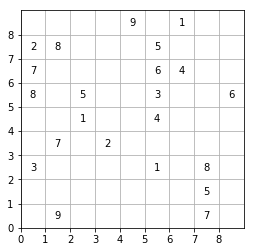

PROBLEM 2:


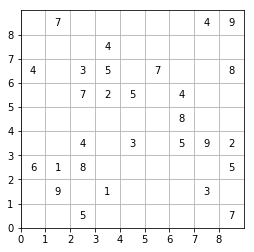

PROBLEM 3:


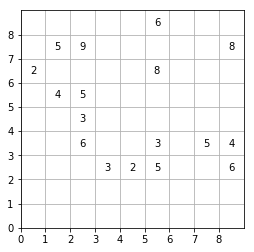

In [8]:
display_grid(SUDOKU_PROBLEM_1, "PROBLEM 1")
display_grid(SUDOKU_PROBLEM_2, "PROBLEM 2")
display_grid(SUDOKU_PROBLEM_3, "PROBLEM 3")

#### Choose your preferred problem (SUDOKU_PROBLEM_1 or SUDOKU_PROBLEM_2 or SUDOKU_PROBLEM_3)
If you change the problem, ensure to re-run all cells below this one.

In [9]:
problem = SUDOKU_PROBLEM_3

### Step 2: Set up the prescriptive model

In [10]:
mdl = CpoModel(name="Sudoku")

#### Define the decision variables

In [11]:
grid = [[integer_var(min=1, max=9, name="C" + str(l) + str(c)) for l in GRNG] for c in GRNG]

#### Express the business constraints

Add alldiff constraints for lines

In [12]:
for l in GRNG:
    mdl.add(all_diff([grid[l][c] for c in GRNG]))

Add alldiff constraints for columns

In [13]:
for c in GRNG:
    mdl.add(all_diff([grid[l][c] for l in GRNG]))

Add alldiff constraints for sub-squares

In [14]:
ssrng = range(0, 9, 3)
for sl in ssrng:
    for sc in ssrng:
        mdl.add(all_diff([grid[l][c] for l in range(sl, sl + 3) for c in range(sc, sc + 3)]))

Initialize known cells

In [15]:
for l in GRNG:
    for c in GRNG:
        v = problem[l][c]
        if v > 0:
            grid[l][c].set_domain((v, v))

#### Solve with Decision Optimization solve service

In [16]:
print("\nSolving model....")
msol = mdl.solve(TimeLimit=10)


Solving model....


### Step 4: Investigate the solution and then run an example analysis

Initial problem:


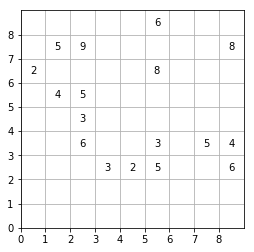

Solve time: 0.13495445251464844
Solution:


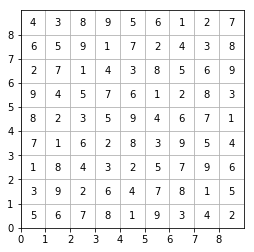

In [17]:
display_grid(problem, "Initial problem")
if msol:
    sol = [[msol[grid[l][c]] for c in GRNG] for l in GRNG]
    stdout.write("Solve time: " + str(msol.get_solve_time()) + "\n")
    display_grid(sol, "Solution")
else:
    stdout.write("No solution found\n")

## Summary

You learned how to set up and use the IBM Decision Optimization CPLEX Modeling for Python to formulate and solve a Constraint Programming model.

#### References
* <a href="https://rawgit.com/IBMDecisionOptimization/docplex-doc/master/docs/index.html" target="_blank" rel="noopener noreferrer">Decision Optimization CPLEX Modeling for Python documentation</a>
* <a href="https://dataplatform.cloud.ibm.com/docs/content/getting-started/welcome-main.html?audience=wdp&context=wdp" target="_blank" rel="noopener noreferrer">Watson Studio documentation</a>
* Need help with DOcplex or to report a bug? Go to <a href="https://developer.ibm.com/answers/smartspace/docloud" target="_blank" rel="noopener noreferrer">https://developer.ibm.com/answers/smartspace/docloud</a>
 Contact us at dofeedback@wwpdl.vnet.ibm.com

<hr>
Copyright © 2017, 2018. This notebook and its source code are released under the terms of the MIT License.

<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>